In [199]:
import pandas as pd
import numpy as np
# import tensorflow as tsf
from matplotlib import pyplot as plt

## K-means 1°

In [200]:
base_wines_red = pd.read_csv('../datasets/wines/winequality-red.csv', sep=';')
base_wines_red['class'] = 'red'

In [201]:
base_wines_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [202]:
base_wines_white= pd.read_csv('../datasets/wines/winequality-white.csv', sep=';')
base_wines_white['class'] = 'white'

In [203]:
base_wines_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [204]:
frames = [base_wines_red, base_wines_white]

In [205]:
base_wines = pd.concat(frames)

In [206]:
base_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [207]:
training = base_wines.sample(frac=.8, random_state=200)

In [208]:
test = base_wines.drop(training.index)

In [209]:
test = test.reset_index(drop=True)

In [210]:
training = training.reset_index(drop=True)

In [211]:
training

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,6.3,0.32,0.32,1.5,0.037,12.0,76.0,0.98993,3.30,0.46,12.3,6,white
1,9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.99760,3.29,0.55,10.4,5,red
2,7.6,0.48,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4,white
3,6.3,0.23,0.50,10.4,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,6,white
4,5.7,0.22,0.25,1.1,0.050,97.0,175.0,0.99099,3.44,0.62,11.1,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,7.1,0.25,0.28,1.6,0.052,46.0,169.0,0.99260,3.05,0.41,10.5,5,white
5194,7.0,0.27,0.29,3.9,0.059,28.0,199.0,0.99610,3.54,0.59,10.3,5,white
5195,7.6,0.35,0.46,14.7,0.047,33.0,151.0,0.99709,3.03,0.53,10.3,5,white
5196,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white


In [212]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red
1,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.400000,5,red
2,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.500000,5,red
3,6.3,0.30,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.300000,6,red
4,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.500000,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,6.2,0.36,0.32,4.0,0.036,44.0,92.0,0.98936,3.20,0.50,13.300000,7,white
761,5.8,0.23,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6,white
762,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6,white
763,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white


In [213]:
wines = []

In [214]:
for j, t in training.iterrows():
    wine = np.linalg.norm((test.iloc[0])[:12]-t[:12])
    wines.append([wine,t[12]])

In [215]:
wines

[[22.437753340851664, 'white'],
 [42.22946868432043, 'red'],
 [47.36201929014429, 'white'],
 [90.939765798557, 'white'],
 [146.19819013968709, 'white'],
 [108.25479654666576, 'white'],
 [50.26104663653553, 'white'],
 [79.54928001348661, 'white'],
 [123.9682560247683, 'white'],
 [20.216777951553013, 'red'],
 [76.22591717447551, 'white'],
 [69.11154436168823, 'white'],
 [117.56436280253638, 'white'],
 [131.7603234522821, 'white'],
 [138.67020784523257, 'white'],
 [80.54194817020259, 'white'],
 [101.41827263866212, 'red'],
 [128.88536498194082, 'white'],
 [12.720109801412878, 'red'],
 [70.68305687652452, 'white'],
 [27.225901087758327, 'red'],
 [8.54585098685906, 'white'],
 [48.652600475205844, 'white'],
 [34.77071737703438, 'white'],
 [77.28978032922333, 'white'],
 [89.32745012374416, 'white'],
 [57.691706776819316, 'white'],
 [52.40139439985257, 'white'],
 [22.22986749848051, 'red'],
 [94.04819477486, 'white'],
 [67.93604054285177, 'white'],
 [141.8425602688065, 'white'],
 [91.265895721

In [216]:
wines.sort(key=lambda x: x[0])

In [217]:
wines

[[1.250569486274153, 'red'],
 [2.0300877444090935, 'red'],
 [2.102427420293029, 'red'],
 [2.180400458631395, 'red'],
 [2.8757311487689527, 'red'],
 [2.8757311487689527, 'red'],
 [3.121884206693131, 'white'],
 [3.2140007794025194, 'red'],
 [3.2421537610051745, 'red'],
 [3.2421537610051745, 'red'],
 [3.2831218409465097, 'red'],
 [3.316771504038226, 'white'],
 [3.3259706868822523, 'red'],
 [3.3318200746739013, 'red'],
 [3.8599759118419383, 'red'],
 [4.016833863878365, 'red'],
 [4.161115236327876, 'white'],
 [4.202404287500192, 'red'],
 [4.376415085432368, 'red'],
 [4.388871773018665, 'white'],
 [4.466993674004922, 'red'],
 [4.490673072046104, 'red'],
 [4.650385069002351, 'red'],
 [4.654231408084476, 'red'],
 [4.6871682775850925, 'red'],
 [4.904927803434012, 'red'],
 [5.071905890294102, 'red'],
 [5.192937993082529, 'red'],
 [5.256636062159906, 'red'],
 [5.263182918054435, 'red'],
 [5.337765632322198, 'white'],
 [5.406127693645424, 'red'],
 [5.435796398872937, 'white'],
 [5.4423739342312745

In [218]:
wines = wines[:3]

In [219]:
wines

[[1.250569486274153, 'red'],
 [2.0300877444090935, 'red'],
 [2.102427420293029, 'red']]

In [220]:
classes = [d[1] for d in wines]

In [221]:
classes

['red', 'red', 'red']

In [222]:
classe = max(set(classes), key=classes.count)

In [223]:
classe

'red'

In [442]:
for i,r in test.iterrows():
  wines = []
  for j,t in training.iterrows():
    dist = np.linalg.norm(r[:12]-t[:12])
    wines.append([dist,t[12]])
    wines.sort(key=lambda x:x[0])
    wines = wines [:3]
    classes = [d[1] for d in wines] 
    classe = max(set(classes), key=classes.count)
    test.at[i,'class_kmens'] = classe

In [443]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,classe_kmens,class_kmens
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red,red,red
1,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.400000,5,red,white,white
2,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.500000,5,red,red,red
3,6.3,0.30,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.300000,6,red,red,red
4,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.500000,6,red,red,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,6.2,0.36,0.32,4.0,0.036,44.0,92.0,0.98936,3.20,0.50,13.300000,7,white,white,white
761,5.8,0.23,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6,white,white,white
762,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6,white,white,white
763,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white,white,white


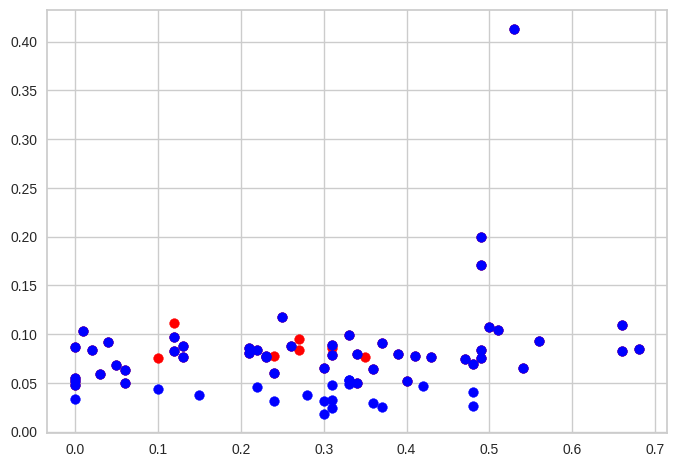

In [445]:
plt.scatter(
    test.query("`class`=='red'")['citric acid'].values,
    test.query("`class`=='red'")['chlorides'].values,
    color='red'
)
plt.scatter(
    test.query("`class_kmens`=='red'")['citric acid'].values,
    test.query("`class_kmens`=='red'")['chlorides'].values, 
    color='blue')

In [424]:
base_wines.iloc[:50, 0]

0      7.4
1      7.8
2      7.8
3     11.2
4      7.4
5      7.4
6      7.9
7      7.3
8      7.8
9      7.5
10     6.7
11     7.5
12     5.6
13     7.8
14     8.9
15     8.9
16     8.5
17     8.1
18     7.4
19     7.9
20     8.9
21     7.6
22     7.9
23     8.5
24     6.9
25     6.3
26     7.6
27     7.9
28     7.1
29     7.8
30     6.7
31     6.9
32     8.3
33     6.9
34     5.2
35     7.8
36     7.8
37     8.1
38     5.7
39     7.3
40     7.3
41     8.8
42     7.5
43     8.1
44     6.8
45     4.6
46     7.7
47     8.7
48     6.4
49     5.6
Name: fixed acidity, dtype: float64

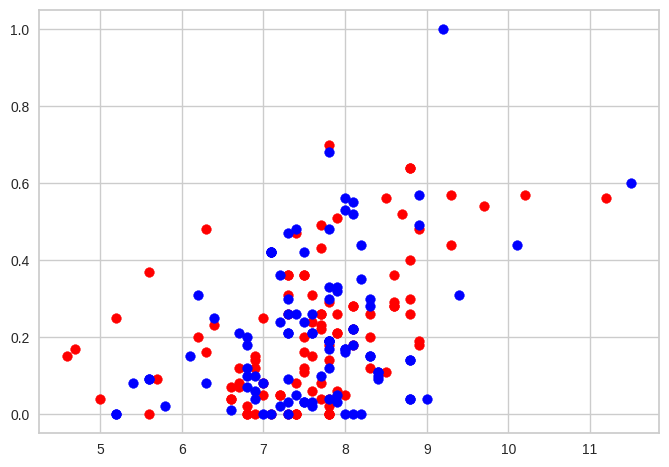

In [421]:
plt.scatter(base_wines.iloc[:100,0],base_wines.iloc[:100, 2],color='red')
plt.scatter(base_wines.iloc[100:200,0],base_wines.iloc[100:200, 2],color='blue')

In [422]:
training

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,6.3,0.32,0.32,1.5,0.037,12.0,76.0,0.98993,3.30,0.46,12.3,6,white
1,9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.99760,3.29,0.55,10.4,5,red
2,7.6,0.48,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4,white
3,6.3,0.23,0.50,10.4,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,6,white
4,5.7,0.22,0.25,1.1,0.050,97.0,175.0,0.99099,3.44,0.62,11.1,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,7.1,0.25,0.28,1.6,0.052,46.0,169.0,0.99260,3.05,0.41,10.5,5,white
5194,7.0,0.27,0.29,3.9,0.059,28.0,199.0,0.99610,3.54,0.59,10.3,5,white
5195,7.6,0.35,0.46,14.7,0.047,33.0,151.0,0.99709,3.03,0.53,10.3,5,white
5196,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white


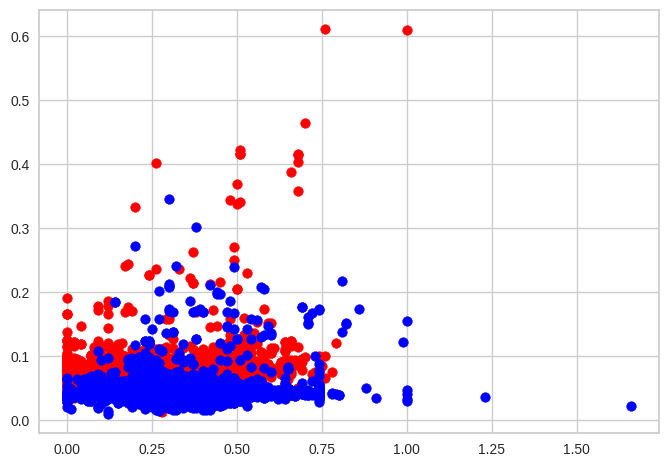

In [423]:
plt.scatter(
    training.query("`class`=='red'")['citric acid'].values,
    training.query("`class`=='red'")['chlorides'].values,
    color='red'
)
plt.scatter(
    training.query("`class`=='white'")['citric acid'].values,
    training.query("`class`=='white'")['chlorides'].values, 
    color='blue')

In [230]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,classe_kmens
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red,red
1,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.400000,5,red,white
2,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.500000,5,red,red
3,6.3,0.30,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.300000,6,red,red
4,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.500000,6,red,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,6.2,0.36,0.32,4.0,0.036,44.0,92.0,0.98936,3.20,0.50,13.300000,7,white,white
761,5.8,0.23,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6,white,white
762,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6,white,white
763,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white,white


In [231]:
Data = base_wines[:200]
x_training = Data.sample(frac=.8, random_state=200)
y_training = x_training['class'].reset_index(drop=True)
x_training = x_training.drop('class', axis=1)
x_test = Data.drop(x_training.index)
y_test = x_test['class'].reset_index(drop=True)
x_test = x_test.drop('class', axis=1).reset_index(drop=True)
x_training = x_training.reset_index(drop=True)

In [232]:
x = x_training.values
y_training = np.where(y_training == 'red',-1, 1)
y_test = np.where(y_test == 'red',-1, 1)
y = y_training

In [233]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

In [234]:
x

array([[ 8.8  ,  0.55 ,  0.04 , ...,  0.6  , 10.9  ,  6.   ],
       [ 7.5  ,  0.705,  0.24 , ...,  1.59 ,  9.5  ,  5.   ],
       [ 7.6  ,  0.55 ,  0.21 , ...,  0.55 ,  9.7  ,  5.   ],
       ...,
       [11.2  ,  0.28 ,  0.56 , ...,  0.58 ,  9.8  ,  6.   ],
       [ 7.3  ,  1.07 ,  0.09 , ...,  0.57 ,  9.   ,  5.   ],
       [ 4.7  ,  0.6  ,  0.17 , ...,  0.6  , 12.9  ,  6.   ]])

## Rede neural 2°

In [371]:
# import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [236]:
rede_neural = MLPClassifier(max_iter=300, verbose=True)

In [237]:
Data = base_wines[:2000]
x_training = Data.sample(frac=.7, random_state=200)
y_training = x_training['class'].reset_index(drop=True)
x_training = x_training.drop('class', axis=1)
x_test = Data.drop(x_training.index)
y_test = x_test['class'].reset_index(drop=True)
x_test = x_test.drop('class', axis=1).reset_index(drop=True)
x_training = x_training.reset_index(drop=True)

In [238]:
x_training

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1,7.0,0.570,0.00,2.00,0.190,12.0,45.0,0.99676,3.31,0.60,9.4,6
2,7.9,0.340,0.36,1.90,0.065,5.0,10.0,0.99419,3.27,0.54,11.2,7
3,7.3,0.910,0.10,1.80,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
4,8.9,0.595,0.41,7.90,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,7.7,1.005,0.15,2.10,0.102,11.0,32.0,0.99604,3.23,0.48,10.0,5
1396,6.7,0.410,0.43,2.80,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6
1397,6.2,0.280,0.22,7.30,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,7
1398,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5


In [239]:
y_training.shape

(1400,)

In [240]:
rede_neural.fit(x_training, y_training)

Iteration 1, loss = 0.27363676
Iteration 2, loss = 0.22799949
Iteration 3, loss = 0.21456043
Iteration 4, loss = 0.20161287
Iteration 5, loss = 0.19570928
Iteration 6, loss = 0.19334236
Iteration 7, loss = 0.19659429
Iteration 8, loss = 0.18268203
Iteration 9, loss = 0.17807567
Iteration 10, loss = 0.17812601
Iteration 11, loss = 0.17920237
Iteration 12, loss = 0.16731535
Iteration 13, loss = 0.16584194
Iteration 14, loss = 0.16151962
Iteration 15, loss = 0.15803009
Iteration 16, loss = 0.15430885
Iteration 17, loss = 0.15742720
Iteration 18, loss = 0.15989580
Iteration 19, loss = 0.15514150
Iteration 20, loss = 0.14981186
Iteration 21, loss = 0.14808239
Iteration 22, loss = 0.16349853
Iteration 23, loss = 0.14665358
Iteration 24, loss = 0.14678869
Iteration 25, loss = 0.14216092
Iteration 26, loss = 0.13686322
Iteration 27, loss = 0.13790731
Iteration 28, loss = 0.13685266
Iteration 29, loss = 0.13491163
Iteration 30, loss = 0.13271941
Iteration 31, loss = 0.13504499
Iteration 32, los

MLPClassifier(max_iter=300, verbose=True)

In [241]:
previsao = rede_neural.predict(x_test)
previsao

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'white', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'white', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'r

In [242]:
y_test

0        red
1        red
2        red
3        red
4        red
       ...  
423    white
424    white
425    white
426    white
427    white
Name: class, Length: 428, dtype: object

In [243]:
accuracy_score(y_test, previsao)

0.9813084112149533

In [244]:
from yellowbrick.classifier import ConfusionMatrix

/home/keven/.cache/pypoetry/virtualenvs/poo-Rr-I_ODB-py3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.9813084112149533

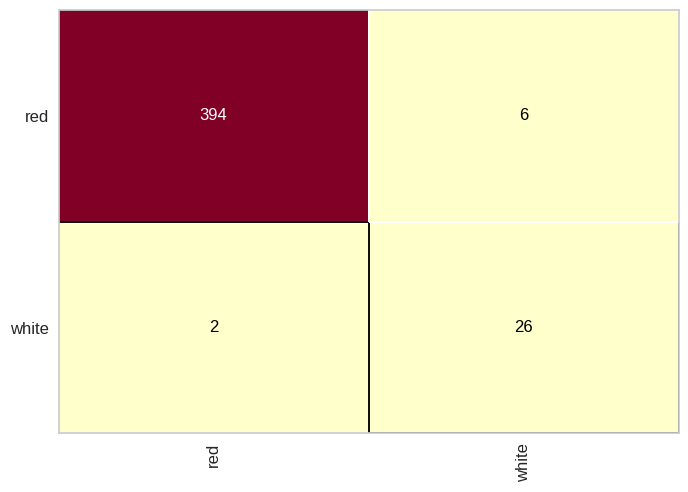

In [245]:
cm = ConfusionMatrix(rede_neural)
cm.fit(x_training, y_training)
cm.score(x_test, y_test)

In [246]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

         red       0.99      0.98      0.99       400
       white       0.81      0.93      0.87        28

    accuracy                           0.98       428
   macro avg       0.90      0.96      0.93       428
weighted avg       0.98      0.98      0.98       428



## Rede  neural 3°

In [379]:
rede_neural = MLPClassifier(max_iter=400, verbose=True, tol=0.00001)

In [406]:
Data = base_wines[:2000]
x_training = Data.sample(frac=.8, random_state=200)
y_training = x_training['quality'].reset_index(drop=True)
x_training = x_training.drop(['class','quality'], axis=1)


In [407]:
x_test = Data.drop(x_training.index)
y_test = x_test['quality'].reset_index(drop=True)
x_test = x_test.drop(['class','quality'], axis=1).reset_index(drop=True)
x_training = x_training.reset_index(drop=True)

In [408]:
x_training

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1,7.0,0.570,0.00,2.00,0.190,12.0,45.0,0.99676,3.31,0.60,9.4
2,7.9,0.340,0.36,1.90,0.065,5.0,10.0,0.99419,3.27,0.54,11.2
3,7.3,0.910,0.10,1.80,0.074,20.0,56.0,0.99672,3.35,0.56,9.2
4,8.9,0.595,0.41,7.90,0.086,30.0,109.0,0.99980,3.27,0.57,9.3
...,...,...,...,...,...,...,...,...,...,...,...
1595,7.2,0.580,0.54,2.10,0.114,3.0,9.0,0.99719,3.33,0.57,10.3
1596,7.6,0.950,0.03,2.00,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
1597,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
1598,8.2,0.350,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0


In [409]:
rede_neural.fit(x_training, y_training)

Iteration 1, loss = 7.62069134
Iteration 2, loss = 3.30560861
Iteration 3, loss = 2.33574644
Iteration 4, loss = 1.79494483
Iteration 5, loss = 1.50400701
Iteration 6, loss = 1.40655022
Iteration 7, loss = 1.36005162
Iteration 8, loss = 1.30362851
Iteration 9, loss = 1.26018140
Iteration 10, loss = 1.23153992
Iteration 11, loss = 1.21266904
Iteration 12, loss = 1.20459344
Iteration 13, loss = 1.18955358
Iteration 14, loss = 1.18200157
Iteration 15, loss = 1.17847716
Iteration 16, loss = 1.17108229
Iteration 17, loss = 1.16929699
Iteration 18, loss = 1.15587453
Iteration 19, loss = 1.15333751
Iteration 20, loss = 1.15311628
Iteration 21, loss = 1.14989856
Iteration 22, loss = 1.15645039
Iteration 23, loss = 1.15159292
Iteration 24, loss = 1.13412743
Iteration 25, loss = 1.13844744
Iteration 26, loss = 1.13375900
Iteration 27, loss = 1.12364120
Iteration 28, loss = 1.12942948
Iteration 29, loss = 1.12060007
Iteration 30, loss = 1.11731834
Iteration 31, loss = 1.11546038
Iteration 32, los

MLPClassifier(max_iter=400, tol=1e-05, verbose=True)

In [410]:
previsao = rede_neural.predict(x_test)
previsao

array([5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6,
       5, 5, 6, 5, 7, 6, 3, 5, 7, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 7, 6, 7, 5, 7, 7, 7, 6, 6, 7, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 7, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 7, 5, 6, 5,
       5, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 6, 6, 5])

In [392]:
y_test

0      5
1      5
2      6
3      6
4      6
      ..
784    6
785    5
786    5
787    5
788    6
Name: quality, Length: 789, dtype: int64

In [411]:
accuracy_score(y_test, previsao)

0.5457875457875457

In [412]:
from yellowbrick.classifier import ConfusionMatrix

/home/keven/.cache/pypoetry/virtualenvs/poo-Rr-I_ODB-py3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.5457875457875457

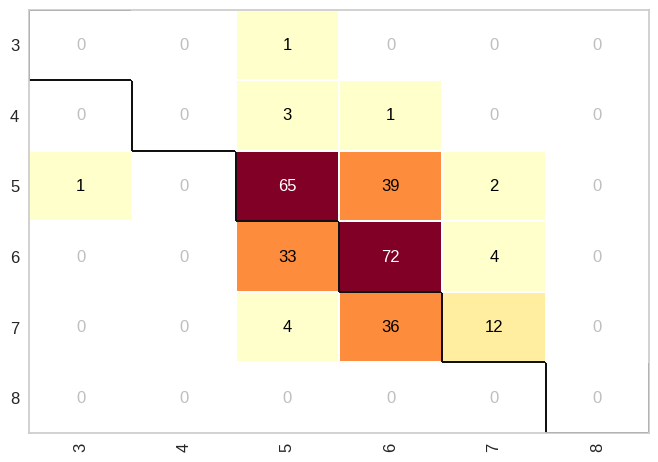

In [413]:
cm = ConfusionMatrix(rede_neural)
cm.fit(x_training, y_training)
cm.score(x_test, y_test)

In [414]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.61      0.61      0.61       107
           6       0.49      0.66      0.56       109
           7       0.67      0.23      0.34        52

    accuracy                           0.55       273
   macro avg       0.35      0.30      0.30       273
weighted avg       0.56      0.55      0.53       273



/home/keven/.cache/pypoetry/virtualenvs/poo-Rr-I_ODB-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keven/.cache/pypoetry/virtualenvs/poo-Rr-I_ODB-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keven/.cache/pypoetry/virtualenvs/poo-Rr-I_ODB-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete